# Background

The even Zernike polynomials are defined on as follows

$
Z_n^m(\rho,\phi) = R_n^m(\rho) \cos(m\phi)
$

the odd ones 

$
Z_n^{-m}(\rho,\phi) = R_n^m(\rho) \sin(m\phi)
$

where $m$ and $n$ are nonnegative integers with $n\ge m$, $\rho$ is the radius and limited to $0\le\rho\le1$. 
The odd and even refer to the symmetry in the function and not the integer $m$. 
The radial polynomials are defined as

\begin{equation}
R_n^m(\rho)=\sum_{k=0}^{\frac{n-m}{2}} \frac{(-1)^k (n-k)!}{k!(\frac{n+m}{2}-k)!(\frac{n-m}{2}-k)!} \rho^{n-2k}
\end{equation}

for $n-m$ is even and $R_n^m=0$ when $n-m$ is odd.

The OSA/ANSI stadard indices for Zernike polynomials is 

\begin{equation}
j = \frac{n(n+2)+m}{2}
\end{equation}

The orthogonality condition when integrating over the unit disk is 

\begin{equation}
\int Z_n^m(\rho,\phi) Z_{n'}^{m'}(\rho,\phi) d^2r = \frac{\epsilon_m \pi}{2n+2} \delta_{n,n'} \delta_{m,m'}
\end{equation}

where $d^2r = \rho d\rho d\phi$ and where $n-m$ and $n'-m'$ are even. The Neumann factor $\epsilon_m$ is defined as $2$ if $m=0$ and $1$ if $m\ne0$

We can decompose a phase $\Phi(\rho,\phi)$ into Zernike coefficients

\begin{equation}
\Phi(\rho,\phi) = \sum_{n=0}^{\infty} \sum_{n=m} \left[ a_{m,n} Z_{n}^{m}(\rho,\phi) +b_{m,n} Z_{n}^{-m}(\rho,\phi) \right]
\end{equation}

\begin{equation}
a_{m,n} = \frac{2n+2}{\epsilon_m \pi} \int \Phi(\rho,\psi) Z_{n}^{m}(\rho,\psi) \rho d\rho d\phi
\end{equation}

\begin{equation}
b_{m,n} = \frac{2n+2}{\epsilon_m \pi} \int \Phi(\rho,\psi) Z_{n}^{-m}(\rho,\psi) \rho d\rho d\phi
\end{equation}

[1] https://en.wikipedia.org/wiki/Zernike_polynomials

# Restart Kernal

In [ ]:
import os
os._exit(00)

# How to Create Coordinates and Make 2D Plots 

<IPython.core.display.Javascript object>


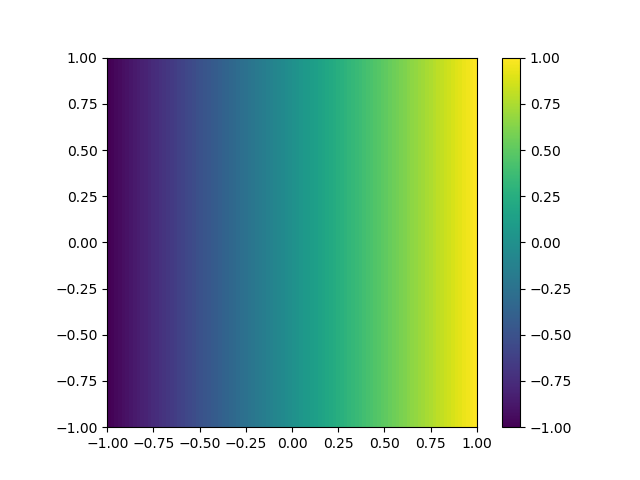

<IPython.core.display.Javascript object>


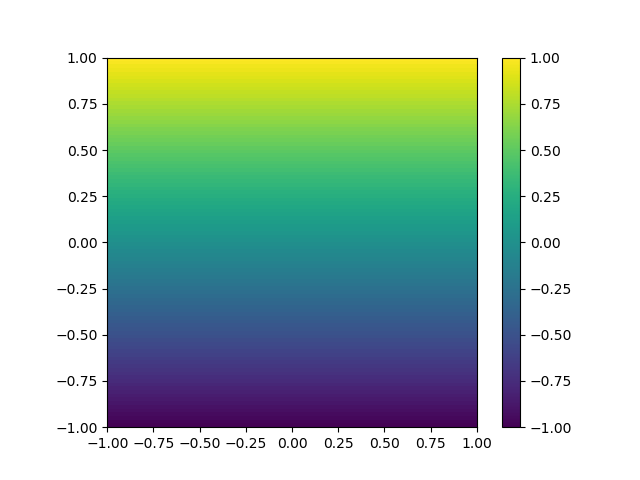

<IPython.core.display.Javascript object>


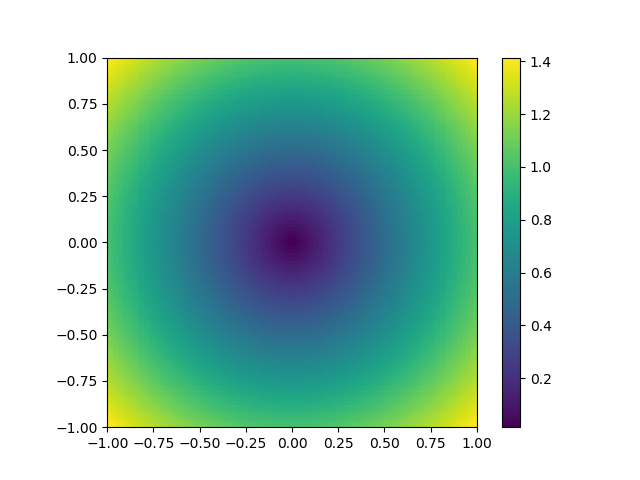

<IPython.core.display.Javascript object>


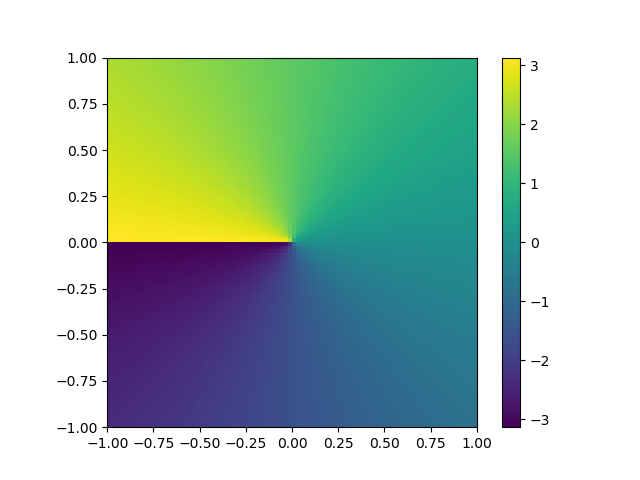

In [1]:
import scipy as sp
%matplotlib notebook
import matplotlib.pylab as plt
from zernike import zernike

radius = 1
resolution = 100

X,Y = zernike.unitsquare(resolution,coord='xy')
R,PHI = zernike.unitsquare(resolution,coord='rphi')

plt.figure()
plt.imshow(X,origin='lower',extent=[-1,1,-1,1])
plt.colorbar()

plt.figure()
plt.imshow(Y,origin='lower',extent=[-1,1,-1,1])
plt.colorbar()

plt.figure()
plt.imshow(R,origin='lower',extent=[-1,1,-1,1])
plt.colorbar()

plt.figure()
plt.imshow(PHI,origin='lower',extent=[-1,1,-1,1])
plt.colorbar()

<IPython.core.display.Javascript object>


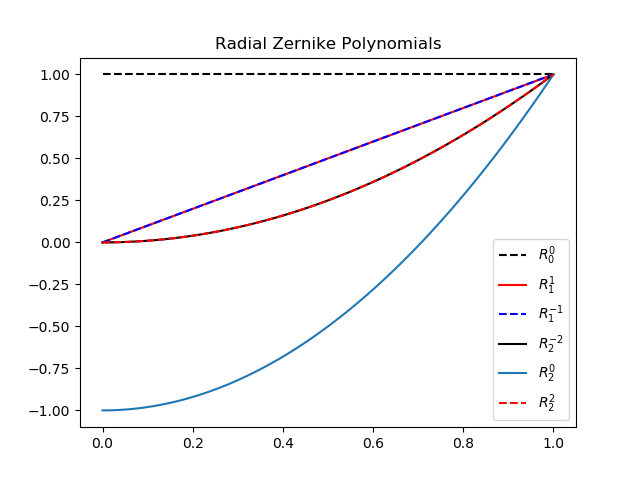

In [2]:
from zernike import zernike

r=sp.linspace(0,1,100)
plt.figure()
plt.plot(r,zernike.RadialZernike(r,0,0,outside=0.0),'k--',label="$R_0^0$")
plt.plot(r,zernike.RadialZernike(r,1,-1,outside=0.0),'r-',label="$R_1^{1}$")
plt.plot(r,zernike.RadialZernike(r,1,1,outside=0.0),'b--',label="$R_1^{-1}$")
plt.plot(r,zernike.RadialZernike(r,2,-2,outside=0.0),'k-',label="$R_2^{-2}$")
plt.plot(r,zernike.RadialZernike(r,2,0,outside=0.0),'-',label="$R_2^{0}$")
plt.plot(r,zernike.RadialZernike(r,2,2,outside=0.0),'r--',label="$R_2^{2}$")
plt.title('Radial Zernike Polynomials')

plt.legend()

# Show Zernike Polynomials

<IPython.core.display.Javascript object>


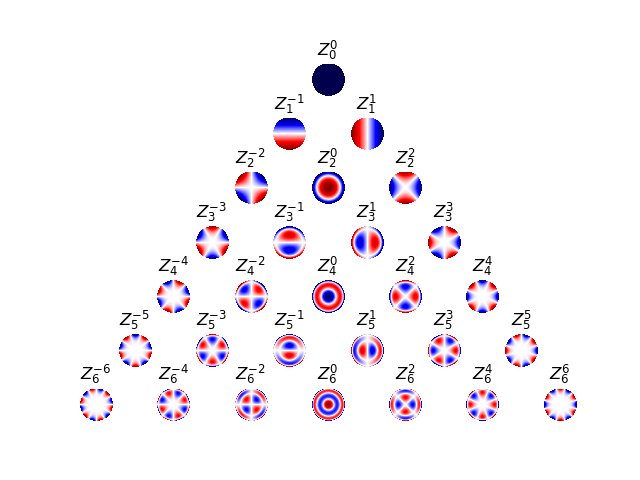

In [2]:
%matplotlib notebook 
import matplotlib.pylab as plt
import scipy as sp
from zernike import zernike


Resolution=1024
nmax = 6;

R,PHI = zernike.unitsquare(Resolution,coord='rphi')

f, ax = plt.subplots(nmax+1,2*nmax+1)

for i in range(nmax+1):
    for j in range(2*nmax+1):
        ax[i,j].axis('off')
        
for n in range(nmax+1): # go up to nmax
    for m in range(-n,n+1): #range from -n to n
        if (n-m) % 2 == 0: # is even?
            ax[n,nmax+m].imshow(zernike.Zernike(R,PHI,n,m,outside=sp.nan),vmin=-1,vmax=1,cmap=plt.cm.seismic_r, origin='lower')
            # Title with n,m index
            ax[n,nmax+m].set_title("$Z_{%g}^{%g}$"%(n,m))
            # Title with OSA Index
            #ax[n,nmax+m].set_title("%g"%(OSAindex(n,m)))

# Calculate A Zernike Coefficient

<IPython.core.display.Javascript object>


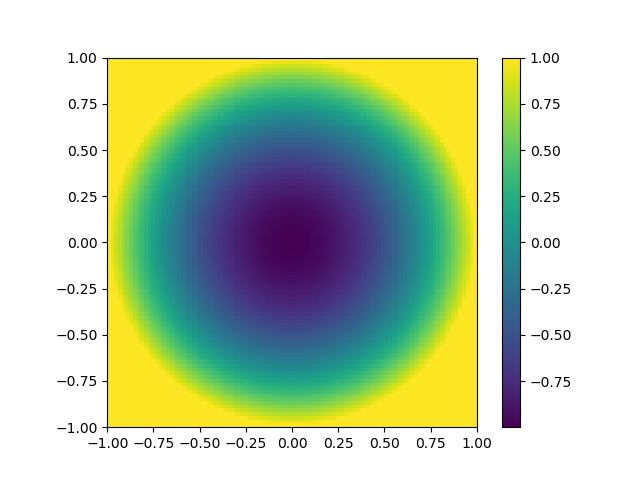

The Zernike coefficient for n=2,m=0 is 0.98857 when it should be 1.
The Zernike coefficient for n=4,m=0 is -0.0188122 when it should be 0.
The difference in both cases is 1.143001e-02 and 1.881220e-02.


In [7]:
%matplotlib notebook
import matplotlib.pylab as plt
import scipy as sp
from zernike import zernike


Resolution=100
nmax = 6;

R,PHI = zernike.unitsquare(Resolution,coord='rphi')
Phase = zernike.Zernike(R,PHI,2,0,outside=1.0)

plt.figure()
plt.imshow(Phase,extent=[-1,1,-1,1])
plt.colorbar()

coefficient1 = zernike.CalculateZernikeCoefficient(Phase,2,0)
coefficient2 = zernike.CalculateZernikeCoefficient(Phase,4,0)
print("The Zernike coefficient for n=2,m=0 is %g when it should be 1." % coefficient1 )
print("The Zernike coefficient for n=4,m=0 is %g when it should be 0." % coefficient2 )
print("The difference in both cases is %e and %e." % (sp.absolute(coefficient1-1),sp.absolute(coefficient2)) )


# Calculate Zernike Spectrum

<IPython.core.display.Javascript object>


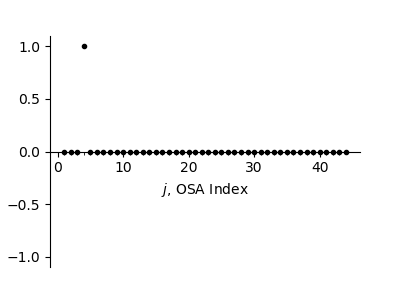

In [5]:
%matplotlib notebook
import matplotlib.pylab as plt
import scipy as sp
from zernike import zernike


Resolution=1000
nmax = 8;

R,PHI = zernike.unitsquare(Resolution,coord='rphi')
Phase = zernike.Zernike(R,PHI,2,0,outside=1.0)


spectrum = zernike.ZernikeSpectrum(Phase,nmax=nmax)
fig, ax = zernike.PlotZernikeSpecturm(spectrum,IncludePiston=False,PlotThreshold=0.0,unit='rad')

# Zernike Coefficients for Ideal Spherical Lens

<IPython.core.display.Javascript object>


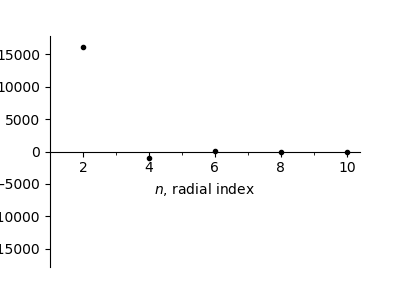

<IPython.core.display.Javascript object>


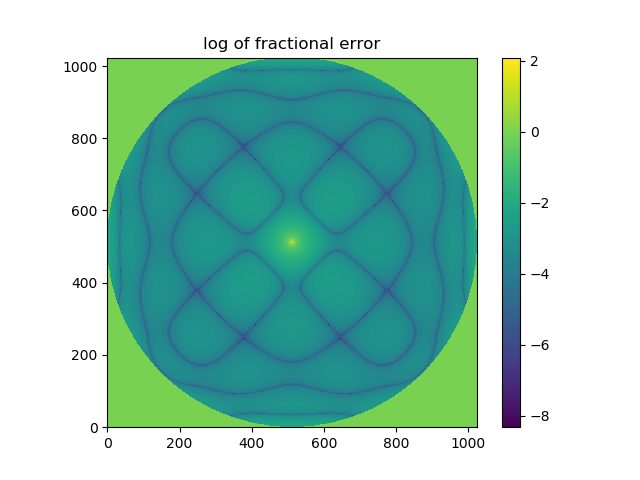

 
f = k R^2/(4*c) = 0.0121459m


In [11]:
%matplotlib notebook
import matplotlib.pylab as plt
import scipy as sp
from zernike import zernike
import seaborn

Resolution=1024
nmax = 10;


X,Y = zernike.unitsquare(Resolution,coord='xy')

# Phase for Spherical Lens
ro = 1e-2;    # [m]
k = 2*sp.pi/800e-9; #[rad/m]
FocalLength = 1e-2; #[m]
Phase = k*sp.sqrt((X*ro)**2+(Y*ro)**2+FocalLength**2) - k*FocalLength
#Phase[R>1]=k*sp.sqrt(ro**2+FocalLength**2) - k*FocalLength



s = zernike.ZernikeSpectrum(Phase,nmax=nmax)

fig, ax = zernike.PlotZernikeSpecturm(s,PlotThreshold=0,Symmetry='Azimuthal')

ReconPhase = zernike.reconstruct(s,Resolution)

R,PHI=zernike.unitsquare(1024,coord='rphi')
error = sp.log10(sp.absolute(ReconPhase-Phase)/Phase)
error[R>1] = sp.nan

plt.figure()
plt.imshow(error,origin='lower')
plt.colorbar()
plt.title('log of fractional error')

print(" ")
print("f = k R^2/(4*c) = %gm" % ( (2*sp.pi/800e-9)*(ro)**2/(4*s['c'][4])))